<a href="https://colab.research.google.com/github/No1-JSPARK/ANN_Proejct_Proposal/blob/main/FM_SEGMENTAION_RE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow.python.keras.models import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.optimizers import *
from tensorflow.python.keras.callbacks import *
from tensorflow import keras
from tensorflow.python.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Mask')

In [4]:
!pwd

/content/drive/MyDrive/Mask


In [5]:
train_images_list = sorted(os.listdir("dataset/train_images"))
train_mask_list = sorted(os.listdir("dataset/train_mask"))
val_images_list = sorted(os.listdir("dataset/val_images"))
val_mask_list = sorted(os.listdir("dataset/val_mask"))
test_images_list = sorted(os.listdir("dataset/test_images"))

In [6]:
train_images, train_masks = [], []
for idx in range(len(train_images_list)):
    img = cv2.imread(os.path.join("dataset/train_images", train_images_list[idx]))
    mask = cv2.imread(os.path.join("dataset/train_mask", train_mask_list[idx]), cv2.IMREAD_GRAYSCALE)
    
    try:
        resize_img = cv2.resize(img, (512, 512), cv2.INTER_AREA).reshape(512, 512, 3) / 255.0
        resize_mask = cv2.resize(mask, (512, 512), cv2.INTER_AREA).reshape(512, 512, 1) / 255.0
    except:
        pass
    train_images.append(resize_img)
    train_masks.append(resize_mask)

In [7]:
val_images, val_masks = [], []
for idx in range(len(val_images_list)):
    img = cv2.imread(os.path.join("dataset/val_images", val_images_list[idx]))
    mask = cv2.imread(os.path.join("dataset/val_mask", val_mask_list[idx]), cv2.IMREAD_GRAYSCALE)

    try:
        resize_img = cv2.resize(img, (512, 512), cv2.INTER_AREA).reshape(512, 512, 3) / 255.0
        resize_mask = cv2.resize(mask, (512, 512), cv2.INTER_AREA).reshape(512, 512, 1) / 255.0
    except:
        pass
    val_images.append(resize_img)
    val_masks.append(resize_mask)

In [8]:
test_images = []
for idx in range(len(test_images_list)):
    img = cv2.imread(os.path.join("dataset/test_images", test_images_list[idx]))

    try:
        resize_img = cv2.resize(img, (512, 512), cv2.INTER_AREA).reshape(512, 512, 3) / 255.0
    except:
        pass
    test_images.append(resize_img)

In [9]:
train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)
test_images = np.array(test_images)

In [10]:
print("Train shape :", train_images.shape, train_masks.shape, "Val Shape :", val_images.shape, val_masks.shape, "Test Shape :", test_images.shape)

Train shape : (181, 512, 512, 3) (181, 512, 512, 1) Val Shape : (20, 512, 512, 3) (20, 512, 512, 1) Test Shape : (20, 512, 512, 3)


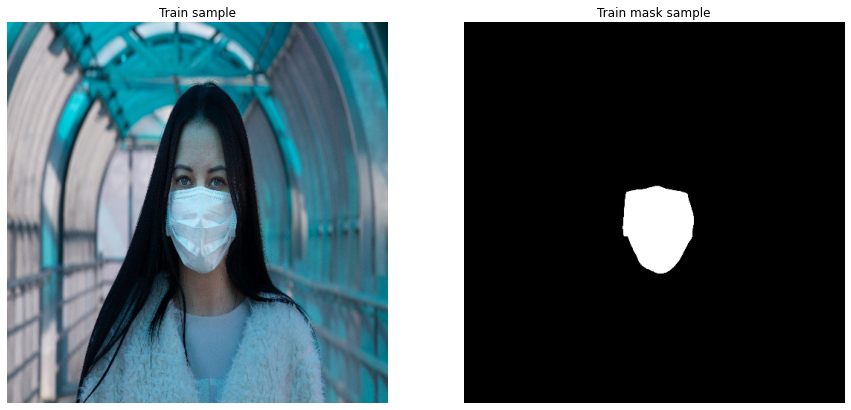

In [11]:
for idx in train_images:
    img = cv2.cvtColor(idx.astype(np.float32), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Train sample")

    ##pred_mask_re = pred_mask[:, :, 0]
    ##print(pred_mask.shape, pred_mask_re.shape)
    
    train_masks_re = train_masks[0, :, :, 0]  
    plt.subplot(1, 2, 2)
    plt.imshow(train_masks_re, "gray")
    plt.title("Train mask sample")
    plt.axis('off')
    plt.show()
    break

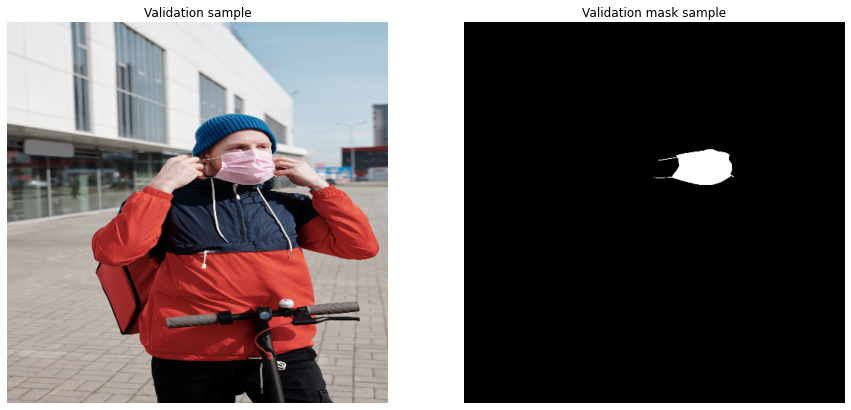

In [12]:
for idx in val_images:
    img = cv2.cvtColor(idx.astype(np.float32), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Validation sample")

    ##pred_mask_re = pred_mask[:, :, 0]
    ##print(pred_mask.shape, pred_mask_re.shape)
    
    val_masks_re = val_masks[0, :, :, 0]  
    plt.subplot(1, 2, 2)
    plt.imshow(val_masks_re, "gray")
    plt.title("Validation mask sample")
    plt.axis('off')
    plt.show()
    break

In [14]:
def mask_new(input_size = (512,512,3)):
  inputs = Input(input_size)
  conv = Conv2D(16, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
  conv = MaxPooling2D((2, 2), padding='same')(conv)
  conv = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(conv)
  conv = MaxPooling2D((2, 2), padding='same')(conv)
  conv = Conv2D(4, (3,3), activation = 'relu', padding = 'same')(conv)
  encoded = MaxPooling2D((2, 2), padding='same')(conv)

  conv = Conv2D(4, (3,3), activation = 'relu', padding = 'same')(encoded)
  conv = UpSampling2D((2, 2))(conv)
  conv = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(conv)
  conv = UpSampling2D((2, 2))(conv)
  conv = Conv2D(16, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv)
  conv = UpSampling2D((2, 2))(conv)

  outputs = conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv)
  

  model = Model(inputs=inputs, outputs=outputs)
  return model


In [15]:
model = mask_new()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 4)       292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 4)         0     

In [17]:
history = model.fit(train_images, train_masks, validation_data = (val_images, val_masks), epochs = 5, batch_size = 32, verbose = 1, shuffle=True)

Epoch 1/5
6/6 [==============================] - 13s 550ms/step - loss: 0.6925 - accuracy: 0.5186 - val_loss: 0.5823 - val_accuracy: 0.9649
Epoch 2/5
6/6 [==============================] - 1s 224ms/step - loss: 0.4870 - accuracy: 0.9792 - val_loss: 0.4271 - val_accuracy: 0.9702
Epoch 3/5
6/6 [==============================] - 1s 226ms/step - loss: 0.2704 - accuracy: 0.9806 - val_loss: 0.2812 - val_accuracy: 0.9704
Epoch 4/5
6/6 [==============================] - 1s 226ms/step - loss: 0.1558 - accuracy: 0.9806 - val_loss: 0.2907 - val_accuracy: 0.9705
Epoch 5/5
6/6 [==============================] - 1s 218ms/step - loss: 0.1676 - accuracy: 0.9807 - val_loss: 0.3074 - val_accuracy: 0.9705


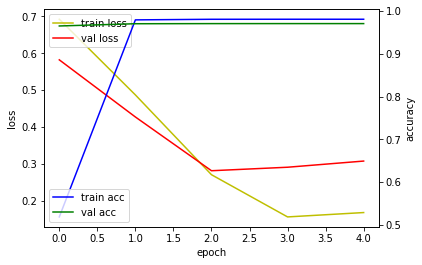

In [18]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label='val loss')
acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

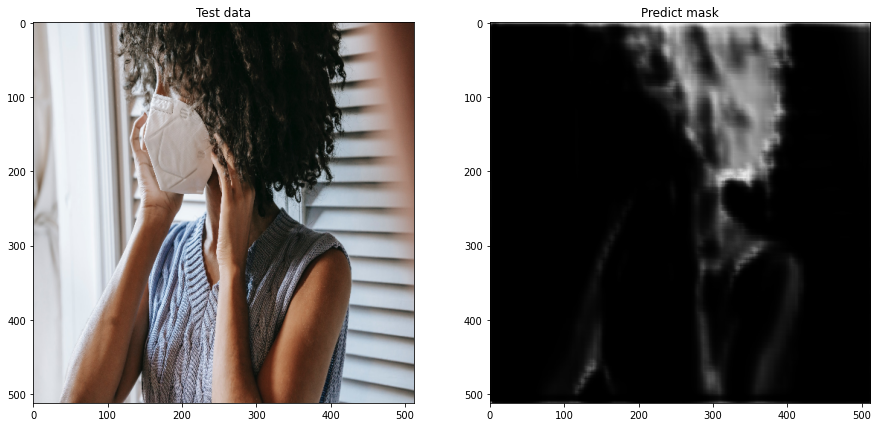

In [20]:
for idx in test_images:
    pred_mask = model(idx.reshape(1, 512, 512, 3))[0]
    img = cv2.cvtColor(idx.astype(np.float32), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Test data")

    pred_mask_re = pred_mask[:, :, 0]
    ##print(pred_mask.shape, pred_mask_re.shape)
  
    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask_re, "gray")
    plt.title("Predict mask")
    plt.show()
    break


In [19]:
## 기존 모델

def mask_seg(input_size = (512,512,3)):
    inputs = Input(input_size)
    conv = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    outputs = conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [20]:
##model = mask_seg()
##model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
##model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 512, 512, 16)      448       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 512, 512, 1)       17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
